In [24]:
import pandas as pd
from rdkit import Chem

def prepare_data():
    df_main = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\init_data\pKa_Prediction_Starting data_2024.01.25.csv', index_col=0)
    # df_main = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\init_data\pKa_Prediction_Starting data_2024.05.07.csv', index_col=0)

    SMILES_to_fgroup = {}
    SMILES_to_identificator = {}
    SMILES_to_cycle_type = {}
    SMILES_to_logP = {}
    for index, row in df_main.iterrows():
        SMILES = row['Amides for LogP']
        if pd.isnull(SMILES):
            continue
        
        SMILES_to_fgroup[SMILES] = row['F group']
        SMILES_to_identificator[SMILES] = row['identificator']
        SMILES_to_cycle_type[SMILES] = row['Framework']
        SMILES_to_logP[SMILES] = row['LogP']
    
    return SMILES_to_fgroup, SMILES_to_identificator, SMILES_to_cycle_type, SMILES_to_logP

def train_test_smiles_data(is_canon=True):
    train = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\logP_lipophilicity_data\gnn_cv\train.csv')
    test = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\logP_lipophilicity_data\gnn_cv\test.csv')

    train_SMILES = train['Smiles'].tolist()
    test_SMILES = test['Smiles'].tolist()

    if is_canon:
        for train_index in range(len(train_SMILES)):
            train_SMILES[train_index] = Chem.CanonSmiles(train_SMILES[train_index])
        for test_index in range(len(test_SMILES)):
            test_SMILES[test_index] = Chem.CanonSmiles(test_SMILES[test_index])
    
    return train_SMILES, test_SMILES

In [25]:
SME_fluorine = {'O=C(NC1=CC=CC=C1)C1CCCCC1': 0.0, 'O=C(NC1=CC=CC=C1)[C@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'O=C(NC1=CC=CC=C1)[C@@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'FC1(F)[C@H]2C[C@H](C[C@@H]12)C(=O)NC1=CC=CC=C1': -0.192, 'FC1(F)[C@H]2C[C@@H](C[C@@H]12)C(=O)NC1=CC=CC=C1': -0.056, 'O=C(NC1=CC=CC=C1)C1CCC1': 0.0, 'FCC1(CCC1)C(=O)NC1=CC=CC=C1': -0.252, 'FC(F)C1(CCC1)C(=O)NC1=CC=CC=C1': -0.036, 'FC(F)(F)C1(CCC1)C(=O)NC1=CC=CC=C1': 0.276, 'FC(F)(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': 0.585, 'FC(F)(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': 0.589, '[H]C(F)(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': 0.016, '[H]C(F)(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': -0.03, '[H]C([H])(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': -0.19, '[H]C([H])(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': -0.302, 'FC1(F)CC(C1)C(=O)NC1=CC=CC=C1': -0.005, 'FC1(F)CCCC1C(=O)NC1=CC=CC=C1': -0.384, 'FC1(F)CCC(C1)C(=O)NC1=CC=CC=C1': -0.154, 'FC1(F)CCCCC1C(=O)NC1=CC=CC=C1': -0.388, 'FC1(F)CCCCCC1C(=O)NC1=CC=CC=C1': -0.354, 'FC1(F)CCCCC(C1)C(=O)NC1=CC=CC=C1': -0.232, 'FC1(F)CCCC(CC1)C(=O)NC1=CC=CC=C1': -0.302, 'CCC(F)(F)CC(=O)NC1=CC=CC=C1': -0.057, 'FC(F)CCCC(=O)NC1=CC=CC=C1': -0.077, 'O=C(NC1=CC=CC=C1)C1CC1': 0.0, 'O=C(NC1=CC=CC=C1)C1CCCC1': 0.0, 'O=C(NC1=CC=CC=C1)C1CCCCCC1': 0.0, 'CCCCC(=O)NC1=CC=CC=C1': 0.0, 'FC(F)(F)C12CC(C1)(OC2)C(=O)NC1=CC=CC=C1': 0.585, 'O=C(NC1=CC=CC=C1)C12CC(C1)CO2': 0.0, 'O=C(NC1=CC=CC=C1)C1=CC=CC=C1': 0.0, 'FC(F)(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1': 0.503, '[H]C(F)(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1': -0.075, '[H]C([H])(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1': -0.176, 'FC(F)(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1': 0.698, 'FC(F)(F)[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1': 0.605, '[H]C(F)(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1': 0.198, '[H]C(F)(F)[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1': 0.35, '[H]C([H])(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1': 0.146, 'O=C(NC1=CC=CC=C1)C1CC11CC1': 0.0, 'FC1(F)C(C(=O)NC2=CC=CC=C2)C11CC1': 0.023, 'FC1(F)CC11CC1C(=O)NC1=CC=CC=C1': 0.173, 'FC1(F)[C@H]2C[C@H](C[C@@H]12)NC(=O)C1=CC=CC=C1': 0.029, 'FC1(F)CCC(CC1)NC(=O)C1=CC=CC=C1': -0.375, 'O=C(NC1CCCCC1)C1=CC=CC=C1': 0.0, 'O=C(N[C@@H]1C[C@@H]2C[C@@H]2C1)C1=CC=CC=C1': 0.0, 'O=C(N[C@H]1C[C@@H]2C[C@@H]2C1)C1=CC=CC=C1': 0.0, 'FC(F)(F)C12CC(C1)CN2C(=O)C1=CC=CC=C1': 0.463, 'FC(F)(F)C1CCCN1C(=O)C1=CC=CC=C1': 0.908, 'O=C(N1CC2CC1C2)C1=CC=CC=C1': 0.0, 'O=C(N1CCCC1)C1=CC=CC=C1': 0.0, 'CC12CC(C1)CN2C(=O)C1=CC=CC=C1': -0.0, 'FC(F)(F)C12CCC(CN1C(=O)C1=CC=CC=C1)C2': 0.636, 'FC(F)(F)C12CCC(CC1)CN2C(=O)C1=CC=CC=C1': 0.498, 'FC(F)(F)C1CCCCN1C(=O)C1=CC=CC=C1': 0.725, 'O=C(N1CC2CCC1C2)C1=CC=CC=C1': -0.0, 'CC12CCC(CC1)CN2C(=O)C1=CC=CC=C1': 0.0, 'O=C(N1CC2CCC1CC2)C1=CC=CC=C1': 0.0, 'O=C(N1CCCCC1)C1=CC=CC=C1': -0.0, 'FC(F)(F)C12CC(CN1C(=O)C1=CC=CC=C1)CCC2': 0.496, 'O=C(N1CC2CC1CCC2)C1=CC=CC=C1': -0.0, 'CC12CC(CN1C(=O)C1=CC=CC=C1)CCC2': 0.0, 'FC1(F)CC2CC(CN(C2)C(=O)C2=CC=CC=C2)C1': -0.4, 'FC1(F)CC2CN(CC(C1)C2(F)F)C(=O)C1=CC=CC=C1': -0.501, 'FC1(F)C2CCCC1CN(C2)C(=O)C1=CC=CC=C1': -0.019, 'FC1(F)C2COCC1CN(C2)C(=O)C1=CC=CC=C1': 0.353, 'O=C(N1CC2COCC(C2)C1)C1=CC=CC=C1': 0.0, 'FC1(F)C2CCC1CN(C2)C(=O)C1=CC=CC=C1': -0.049, 'O=C(N1CC2CCC(C2)C1)C1=CC=CC=C1': -0.0, 'O=C(N1CCC1)C1=CC=CC=C1': 0.0, 'FC1CN(C1)C(=O)C1=CC=CC=C1': -0.125, 'FC1CCN(C1)C(=O)C1=CC=CC=C1': -0.284, 'FC1(F)CCN(C1)C(=O)C1=CC=CC=C1': 0.18, 'F[C@H]1CN(C[C@H]1F)C(=O)C1=CC=CC=C1': -0.145, 'F[C@@H]1CN(C[C@H]1F)C(=O)C1=CC=CC=C1': -0.121, 'FC1CCCN(C1)C(=O)C1=CC=CC=C1': -0.354, 'FC1(F)CCCN(C1)C(=O)C1=CC=CC=C1': -0.0, 'F[C@H]1C[C@@H](F)CN(C1)C(=O)C1=CC=CC=C1': -0.429, 'F[C@H]1C[C@H](F)CN(C1)C(=O)C1=CC=CC=C1': -0.429, 'F[C@@H]1CCN(C[C@@H]1F)C(=O)C1=CC=CC=C1': -0.423, 'F[C@@H]1CCN(C[C@H]1F)C(=O)C1=CC=CC=C1': -0.262, 'FC(F)(F)C1(CCC1)NC(=O)C1=CC=CC=C1': 0.55, 'FCC1(CCC1)NC(=O)C1=CC=CC=C1': 0.083, 'FC(F)(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 0.77, 'FC(F)(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 0.679, '[H]C(F)(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 0.021, '[H]C(F)(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 0.035, '[H]C([H])(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': -0.211, '[H]C([H])(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': -0.186, '[H]C(F)(F)C1CCCCN1C(=O)C1=CC=CC=C1': 0.427, '[H]C([H])(F)C1CCCCN1C(=O)C1=CC=CC=C1': 0.321, '[H]C(F)(F)C1CCCN1C(=O)C1=CC=CC=C1': 0.564, '[H]C([H])(F)C1CCCN1C(=O)C1=CC=CC=C1': 0.33, 'FC(F)(F)C1CCN1C(=O)C1=CC=CC=C1': 0.73, '[H]C(F)(F)C1CCN1C(=O)C1=CC=CC=C1': 0.398, '[H]C([H])(F)C1CCN1C(=O)C1=CC=CC=C1': 0.287, '[H]C(F)(F)CNC(=O)C1=CC=CC=C1': 0.167, 'FC(F)(F)C1CCCN(C1)C(=O)C1=CC=CC=C1': 0.702, '[H]C(F)(F)C1CCCN(C1)C(=O)C1=CC=CC=C1': 0.152, '[H]C([H])(F)C1CCCN(C1)C(=O)C1=CC=CC=C1': -0.112, 'FC(F)(F)C1CCN(C1)C(=O)C1=CC=CC=C1': 0.586, '[H]C(F)(F)C1CCN(C1)C(=O)C1=CC=CC=C1': 0.209, 'FC(F)(F)C1CN(C1)C(=O)C1=CC=CC=C1': 0.576, '[H]C(F)(F)C1CN(C1)C(=O)C1=CC=CC=C1': 0.252, '[H]C([H])(F)C1CN(C1)C(=O)C1=CC=CC=C1': -0.04, '[H]C(F)(F)CCNC(=O)C1=CC=CC=C1': 0.188, '[H]C([H])(F)CCNC(=O)C1=CC=CC=C1': -0.03, 'CCNC(=O)C1=CC=CC=C1': 0.0, 'FC(F)(F)C1CCN(CC1)C(=O)C1=CC=CC=C1': 0.433, '[H]C([H])(F)C1CCN(CC1)C(=O)C1=CC=CC=C1': -0.232, '[H]C([H])(F)CCCNC(=O)C1=CC=CC=C1': -0.177, '[H]C(F)(F)CCCNC(=O)C1=CC=CC=C1': 0.018, 'FC(F)(F)CCCNC(=O)C1=CC=CC=C1': 0.486, 'CCCNC(=O)C1=CC=CC=C1': 0.0, 'FC1(F)CC(C1)NC(=O)C1=CC=CC=C1': -0.019, 'FC1(F)CCCC1NC(=O)C1=CC=CC=C1': -0.327, 'FC1(F)CCCCC1NC(=O)C1=CC=CC=C1': -0.41, 'FC1(F)CCCC(C1)NC(=O)C1=CC=CC=C1': -0.459, 'FC1(F)CCCCCC1NC(=O)C1=CC=CC=C1': -0.333, 'FC1(F)CCCCC(C1)NC(=O)C1=CC=CC=C1': -0.278, 'FC1(F)CCCC(CC1)NC(=O)C1=CC=CC=C1': -0.51, 'CCC(F)(F)CNC(=O)C1=CC=CC=C1': -0.192, 'CC(F)(F)CCNC(=O)C1=CC=CC=C1': -0.169, 'FC(F)CCCNC(=O)C1=CC=CC=C1': 0.038, 'O=C(NC1CC1)C1=CC=CC=C1': 0.0, 'O=C(NC1CCCC1)C1=CC=CC=C1': 0.0, 'O=C(NC1CCCCCC1)C1=CC=CC=C1': 0.0, 'CCCCNC(=O)C1=CC=CC=C1': 0.0, 'O=C(NC1CC2(CCC2)C1)C1=CC=CC=C1': 0.0, 'FC1(F)CC2(CC(C2)NC(=O)C2=CC=CC=C2)C1': -0.303, 'FC(F)(F)[C@@H]1CC[C@H]1NC(=O)C1=CC=CC=C1': 0.596, 'FC(F)(F)[C@@H]1C[C@H]1NC(=O)C1=CC=CC=C1': 0.437, 'FC(F)(F)[C@@H]1C[C@@H]1NC(=O)C1=CC=CC=C1': 0.597, '[H]C(F)(F)[C@@H]1C[C@H]1NC(=O)C1=CC=CC=C1': 0.05, '[H]C(F)(F)[C@@H]1C[C@@H]1NC(=O)C1=CC=CC=C1': 0.438, 'C[C@@H]1C[C@H]1NC(=O)C1=CC=CC=C1': 0.0, 'C[C@@H]1C[C@@H]1NC(=O)C1=CC=CC=C1': 0.0, 'O=C(NC1CC11CC1)C1=CC=CC=C1': 0.0, 'FC1(F)CC11CC1NC(=O)C1=CC=CC=C1': -0.037, 'O=C(NC1CCC1)C1=CC=CC=C1': 0.0, 'FC1(F)CC1C(=O)NC1=CC=CC=C1': 0.121, 'FC1(F)CC2(CC(C2)C(=O)NC2=CC=CC=C2)C1': -0.379, 'FC1CCN(CC1)C(=O)C1=CC=CC=C1': -0.157, 'FC1(F)CCC(CC1)C(=O)NC1=CC=CC=C1': -0.277, '[H]C(F)(F)[C@@H]1CC[C@H]1NC(=O)C1=CC=CC=C1': -0.002, 'O=C(NC1=CC=CC=C1)C1CC2(CCC2)C1': 0.0, 'O=C(N1CC2CCCC(C2)C1)C1=CC=CC=C1': 0.0, 'FC1(F)CCN(CC1)C(=O)C1=CC=CC=C1': -0.218, '[H]C(F)(F)C1CCN(CC1)C(=O)C1=CC=CC=C1': 0.096, 'C[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1': 0.0, 'FC(F)(F)CCNC(=O)C1=CC=CC=C1': 0.633, '[H]C(F)(F)C12CC(C1)(OC2)C(=O)NC1=CC=CC=C1': 0.387, 'FC1(F)CCC1NC(=O)C1=CC=CC=C1': -0.271, '[H]C([H])(F)C1CCN(C1)C(=O)C1=CC=CC=C1': 0.056, 'FC1(F)CN(C1)C(=O)C1=CC=CC=C1': 0.204, 'FC1(F)CCC(C1)NC(=O)C1=CC=CC=C1': -0.204, '[H]C([H])(F)[C@@H]1CC[C@H]1NC(=O)C1=CC=CC=C1': -0.163, 'FC1(F)CCC1C(=O)NC1=CC=CC=C1': -0.237, 'FC1(F)[C@H]2C[C@@H](C[C@@H]12)NC(=O)C1=CC=CC=C1': 0.018, '[H]C([H])(F)CNC(=O)C1=CC=CC=C1': -0.017, 'FC(F)C1(CCC1)NC(=O)C1=CC=CC=C1': 0.358, 'C[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1': 0.0, 'FC1(F)CCCC(C1)C(=O)NC1=CC=CC=C1': -0.167, 'CC(F)(F)CCC(=O)NC1=CC=CC=C1': -0.172}

cyclobutane = {1: {}, 2: {}, 3: {}} # logP_O=C(N1CCC1)C1=CC=CC=C1
cyclopentane = {1: {}, 2: {}, 3: {}} #  logP_O=C(N1CCCC1)C1=CC=CC=C1
cyclohexan = {1: {}, 2: {}, 3: {}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
methane = {1: {}, 2: {}, 3: {}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

SMILES_to_fgroup, SMILES_to_identificator, SMILES_to_cycle_type, SMILES_to_logP = prepare_data()
train_SMILES, test_SMILES = train_test_smiles_data(False)

In [26]:
SME_fluorine_canon_smiles = {}
for smiles, sme in SME_fluorine.items():
    SME_fluorine_canon_smiles[Chem.CanonSmiles(smiles)] = sme

In [27]:
# df_main = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\init_data\pKa_Prediction_Starting data_2024.05.07.csv', index_col=0)
df_main = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\init_data\pKa_Prediction_Starting data_2024.01.25.csv', index_col=0)

gem_SME, CHF_single_SME, CHF_double_SME = [], [], []
gem, CHF_single, CHF_double = [], [], []

for index, row in df_main.iterrows():
    SMILES = row['Amides for LogP']
    # canon_SMILES = Chem.CanonSmiles(SMILES)
    # print(SMILES)
    if SMILES not in train_SMILES and SMILES not in test_SMILES:
        continue
    
    fluorine_group = row['F group']

    if "sec" not in row['identificator'].lower() or 's' in SMILES.lower():
        continue

    if fluorine_group not in ['CHF', 'gem-CF2']:
        continue
    
    if fluorine_group == 'gem-CF2':
        gem.append(row['LogP'])
        gem_SME.append(SME_fluorine[SMILES])
    elif fluorine_group == 'CHF':
        if SMILES.lower().count('f') == 1:
            CHF_single.append(row['LogP'])
            CHF_single_SME.append(SME_fluorine[SMILES])
        elif SMILES.lower().count('f') == 2:
            CHF_double.append(row['LogP'])
            CHF_double_SME.append(SME_fluorine[SMILES])
    print(SMILES, row['F group'], row['LogP'])

FC1(F)CC2CC(CN(C2)C(=O)C2=CC=CC=C2)C1 gem-CF2 1.59
FC1(F)CC2CN(CC(C1)C2(F)F)C(=O)C1=CC=CC=C1 gem-CF2 1.84
FC1(F)C2CCCC1CN(C2)C(=O)C1=CC=CC=C1 gem-CF2 2.18
FC1(F)C2COCC1CN(C2)C(=O)C1=CC=CC=C1 gem-CF2 1.19
FC1(F)C2CCC1CN(C2)C(=O)C1=CC=CC=C1 gem-CF2 2.09
FC1(F)CCN(CC1)C(=O)C1=CC=CC=C1 gem-CF2 1.51
FC1CN(C1)C(=O)C1=CC=CC=C1 CHF 0.94
FC1(F)CN(C1)C(=O)C1=CC=CC=C1 gem-CF2 1.34
FC1CCN(C1)C(=O)C1=CC=CC=C1 CHF 0.91
FC1(F)CCN(C1)C(=O)C1=CC=CC=C1 gem-CF2 1.35
F[C@H]1CN(C[C@H]1F)C(=O)C1=CC=CC=C1 CHF 1.01
F[C@@H]1CN(C[C@H]1F)C(=O)C1=CC=CC=C1 CHF 1.08
FC1CCCN(C1)C(=O)C1=CC=CC=C1 CHF 1.26
FC1(F)CCCN(C1)C(=O)C1=CC=CC=C1 gem-CF2 1.65
F[C@H]1C[C@@H](F)CN(C1)C(=O)C1=CC=CC=C1 CHF 0.58
F[C@H]1C[C@H](F)CN(C1)C(=O)C1=CC=CC=C1 CHF 1.35
FC1CCN(CC1)C(=O)C1=CC=CC=C1 CHF 1.31
F[C@@H]1CCN(C[C@@H]1F)C(=O)C1=CC=CC=C1 CHF 1.15
F[C@@H]1CCN(C[C@H]1F)C(=O)C1=CC=CC=C1 CHF 1.26


In [28]:
print(f"gem: {sum(gem) / len(gem)}, CHF single: {sum(CHF_single) / len(CHF_single)}, CHF double: {sum(CHF_double) / len(CHF_double)}")

gem: 1.6377777777777778, CHF single: 1.105, CHF double: 1.0716666666666665


Text(0.5, 1.0, 'Basicity')

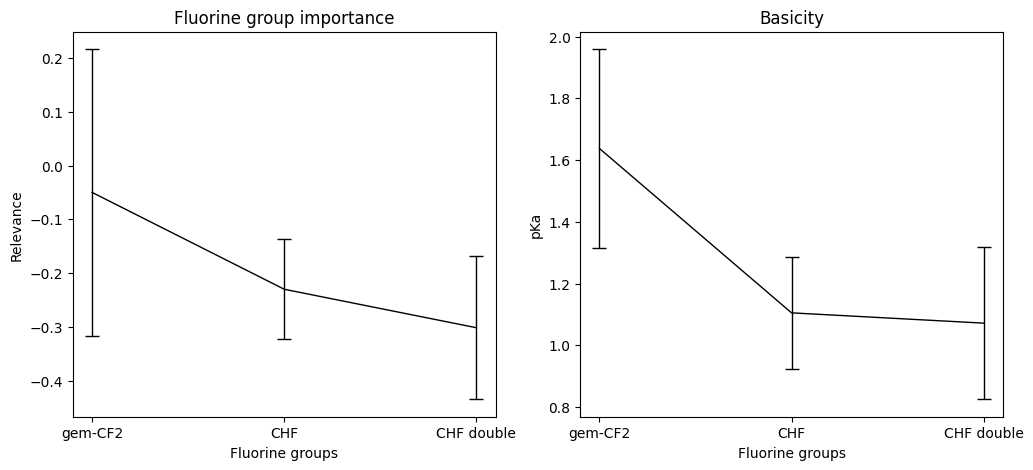

In [29]:
import matplotlib.pyplot as plt
import numpy as np

X = ['gem-CF2', 'CHF', 'CHF double']
Y_pka = [[gem], [CHF_single], [CHF_double]]
mean_Y_pka = [np.array(i).mean() for i in Y_pka]
std_deviation_Y_pka = [np.array(i).std() for i in Y_pka]

Y_sme = [[gem_SME], [CHF_single_SME], [CHF_double_SME]]
mean_Y_SME = [np.array(i).mean() for i in Y_sme]
std_deviation_Y_SME = [np.array(i).std() for i in Y_sme]

fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(X, mean_Y_SME, linestyle='-', color="black", label=X, linewidth=1)
for i in range(len(X)):
    ax1.errorbar(X[i], mean_Y_SME[i], yerr=std_deviation_Y_SME[i], color='black', capsize=5, elinewidth=1, markeredgewidth=1)
ax1.set_xlabel("Fluorine groups")
ax1.set_ylabel("Relevance")
ax1.set_title("Fluorine group importance")

ax2.plot(X, mean_Y_pka, linestyle='-', color="black", label=X, linewidth=1)
for i in range(len(X)):
    ax2.errorbar(X[i], mean_Y_pka[i], yerr=std_deviation_Y_pka[i], color='black', capsize=5, elinewidth=1, markeredgewidth=1)
ax2.set_xlabel("Fluorine groups")
ax2.set_ylabel("pKa")
ax2.set_title("Basicity")

---------

---------

---------

---------

---------

SME per class

In [30]:
for SMILES, fluorine_group in SMILES_to_fgroup.items():
    if fluorine_group == 'CHF':
        if SMILES.lower().count('f') == 1:
            SMILES_to_fgroup[SMILES] = 'CHF'
        elif SMILES.lower().count('f') == 2:
            SMILES_to_fgroup[SMILES] = 'CHF-double'

In [31]:
from collections import deque

functional_group_to_smiles = {
    "CF3": "CC(F)(F)F", 
    "CH2F": "CCF", 
    "gem-CF2": "CF", 
    "CHF2": "CC(F)(F)",
    "CHF": "CF",
    "CHF-double": "CF",
    "non-F": ""
}

def find_the_closest_nitrogen_atom(
        mol, atom_id: int, 
        atoms_not_to_visit: list = []):

    queue = deque([(atom_id, 0)])

    visited = set()
    
    while queue:
        current_atom, distance = queue.popleft()
        if mol.GetAtomWithIdx(current_atom).GetSymbol().lower() == 'n':
            break

        visited.add(current_atom)
        
        neighbors = []
        for atom in mol.GetAtomWithIdx(current_atom).GetNeighbors():
            if atom.GetSymbol().lower() == 'h':
                continue
            if atom.GetIdx() in atoms_not_to_visit:
                continue
            neighbors.append(atom.GetIdx())
        
        for neighbor in neighbors:
            if neighbor not in visited:
                queue.append((neighbor, distance + 1))
    
    return current_atom, distance

In [32]:
functional_group_to_smiles

{'CF3': 'CC(F)(F)F',
 'CH2F': 'CCF',
 'gem-CF2': 'CF',
 'CHF2': 'CC(F)(F)',
 'CHF': 'CF',
 'CHF-double': 'CF',
 'non-F': ''}

In [33]:
from rdkit import Chem
import math

smiles_to_distance_to_nitrogen = {}

def is_secondary_amine(mol):
    # find nitrogen atom
    for atom in mol.GetAtoms():
        if atom.GetSymbol().lower() == 'n':
            nitrogen_atom_idx = atom.GetIdx()

    logP_ring_mol = Chem.MolFromSmiles('C1=CC=CC=C1')

    logP_ring_mol_match = list(mol.GetSubstructMatches(logP_ring_mol)[0])

    for atom in mol.GetAtomWithIdx(nitrogen_atom_idx).GetNeighbors():
        if atom.GetIdx() in logP_ring_mol_match:
            return False
    
    return True


for SMILES, relevance in SME_fluorine.items():
    f_group_smiles = functional_group_to_smiles[SMILES_to_fgroup[SMILES]]

    mol = Chem.MolFromSmiles(SMILES)

    fluorine_deratives_mol = Chem.MolFromSmiles(f_group_smiles)

    derivatives_matches = mol.GetSubstructMatches(fluorine_deratives_mol)
    

    min_distance_to_nitrogen = math.inf
    is_secondary_amine_mol = is_secondary_amine(mol)
    
    for match in derivatives_matches:
        from_atom = match[0]

        target_atom, distance = find_the_closest_nitrogen_atom(mol=mol, atom_id=from_atom)
        
        if distance < min_distance_to_nitrogen:
            min_distance_to_nitrogen = distance

    smiles_to_distance_to_nitrogen[SMILES] = min_distance_to_nitrogen

    if SMILES_to_cycle_type[SMILES] == 'methane' and f_group_smiles == "":
        smiles_to_distance_to_nitrogen[SMILES] = len(mol.GetAtoms()) - 2 - 8

    # print(SMILES, is_secondary_amine_mol)
    if not is_secondary_amine_mol:
        smiles_to_distance_to_nitrogen[SMILES] = math.inf
    # print(SMILES, derivatives_matches, SMILES_to_fgroup[SMILES], min_distance_to_nitrogen)

In [34]:
smiles_to_distance_to_nitrogen

{'O=C(NC1=CC=CC=C1)C1CCCCC1': inf,
 'O=C(NC1=CC=CC=C1)[C@H]1C[C@@H]2C[C@@H]2C1': inf,
 'O=C(NC1=CC=CC=C1)[C@@H]1C[C@@H]2C[C@@H]2C1': inf,
 'FC1(F)[C@H]2C[C@H](C[C@@H]12)C(=O)NC1=CC=CC=C1': inf,
 'FC1(F)[C@H]2C[C@@H](C[C@@H]12)C(=O)NC1=CC=CC=C1': inf,
 'O=C(NC1=CC=CC=C1)C1CCC1': inf,
 'FCC1(CCC1)C(=O)NC1=CC=CC=C1': inf,
 'FC(F)C1(CCC1)C(=O)NC1=CC=CC=C1': inf,
 'FC(F)(F)C1(CCC1)C(=O)NC1=CC=CC=C1': inf,
 'FC(F)(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': inf,
 'FC(F)(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': inf,
 '[H]C(F)(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': inf,
 '[H]C(F)(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': inf,
 '[H]C([H])(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': inf,
 '[H]C([H])(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': inf,
 'FC1(F)CC(C1)C(=O)NC1=CC=CC=C1': inf,
 'FC1(F)CCCC1C(=O)NC1=CC=CC=C1': inf,
 'FC1(F)CCC(C1)C(=O)NC1=CC=CC=C1': inf,
 'FC1(F)CCCCC1C(=O)NC1=CC=CC=C1': inf,
 'FC1(F)CCCCCC1C(=O)NC1=CC=CC=C1': inf,
 'FC1(F)CCCCC(C1)C(=O)NC1=CC=CC=C1': inf,
 'FC1(F)CCCC(CC1)C(=O)NC1=CC=CC

cyclobutane CHF FC1CN(C1)C(=O)C1=CC=CC=C1 0.94 -0.125
cyclopentane CHF FC1CCN(C1)C(=O)C1=CC=CC=C1 0.91 -0.284
cyclopentane gem-CF2 FC1(F)CCN(C1)C(=O)C1=CC=CC=C1 1.35 0.18
cyclopentane CHF-double F[C@H]1CN(C[C@H]1F)C(=O)C1=CC=CC=C1 1.01 -0.145
cyclopentane CHF-double F[C@@H]1CN(C[C@H]1F)C(=O)C1=CC=CC=C1 1.08 -0.121
cyclohexane CHF FC1CCCN(C1)C(=O)C1=CC=CC=C1 1.26 -0.354
cyclohexane gem-CF2 FC1(F)CCCN(C1)C(=O)C1=CC=CC=C1 1.65 -0.0
cyclohexane CHF-double F[C@H]1C[C@@H](F)CN(C1)C(=O)C1=CC=CC=C1 0.58 -0.429
cyclohexane CHF-double F[C@H]1C[C@H](F)CN(C1)C(=O)C1=CC=CC=C1 1.35 -0.429
cyclohexane CHF-double F[C@@H]1CCN(C[C@@H]1F)C(=O)C1=CC=CC=C1 1.15 -0.423
cyclohexane CHF-double F[C@@H]1CCN(C[C@H]1F)C(=O)C1=CC=CC=C1 1.26 -0.262
cyclohexane CF3 FC(F)(F)C1CCCN(C1)C(=O)C1=CC=CC=C1 2.21 0.702
cyclohexane CHF2 [H]C(F)(F)C1CCCN(C1)C(=O)C1=CC=CC=C1 1.73 0.152
cyclohexane CH2F [H]C([H])(F)C1CCCN(C1)C(=O)C1=CC=CC=C1 1.52 -0.112
cyclopentane CF3 FC(F)(F)C1CCN(C1)C(=O)C1=CC=CC=C1 1.7 0.586
cyclopentane CH

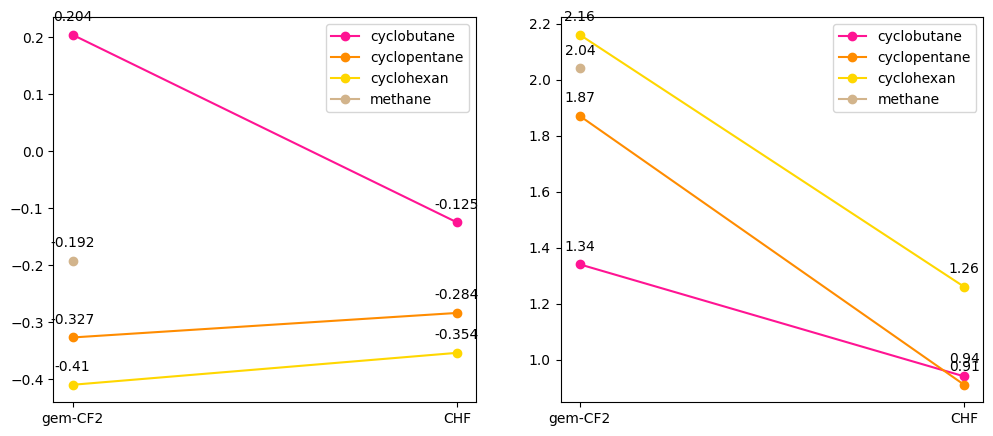

cyclobutane CF3 FC(F)(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1 2.82 0.77
cyclobutane CF3 FC(F)(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1 2.62 0.679
cyclobutane CHF2 [H]C(F)(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1 1.97 0.021
cyclobutane CHF2 [H]C(F)(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1 1.98 0.035
cyclobutane CH2F [H]C([H])(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1 1.78 -0.211
cyclobutane CH2F [H]C([H])(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1 1.77 -0.186
cyclohexane CF3 FC(F)(F)C1CCN(CC1)C(=O)C1=CC=CC=C1 2.2 0.433
cyclohexane CH2F [H]C([H])(F)C1CCN(CC1)C(=O)C1=CC=CC=C1 1.45 -0.232
methane CH2F [H]C([H])(F)CCCNC(=O)C1=CC=CC=C1 1.56 -0.177
methane CHF2 [H]C(F)(F)CCCNC(=O)C1=CC=CC=C1 1.76 0.018
methane CF3 FC(F)(F)CCCNC(=O)C1=CC=CC=C1 2.28 0.486
cyclobutane gem-CF2 FC1(F)CC(C1)NC(=O)C1=CC=CC=C1 1.94 -0.019
cyclohexane gem-CF2 FC1(F)CCCC(C1)NC(=O)C1=CC=CC=C1 2.31 -0.459
methane gem-CF2 CC(F)(F)CCNC(=O)C1=CC=CC=C1 1.81 -0.169
methane CHF2 FC(F)CCCNC(=O)C1=CC=CC=C1 1.76 0.038
cyclohexane CHF FC1CCN(CC1)C(=O)C1

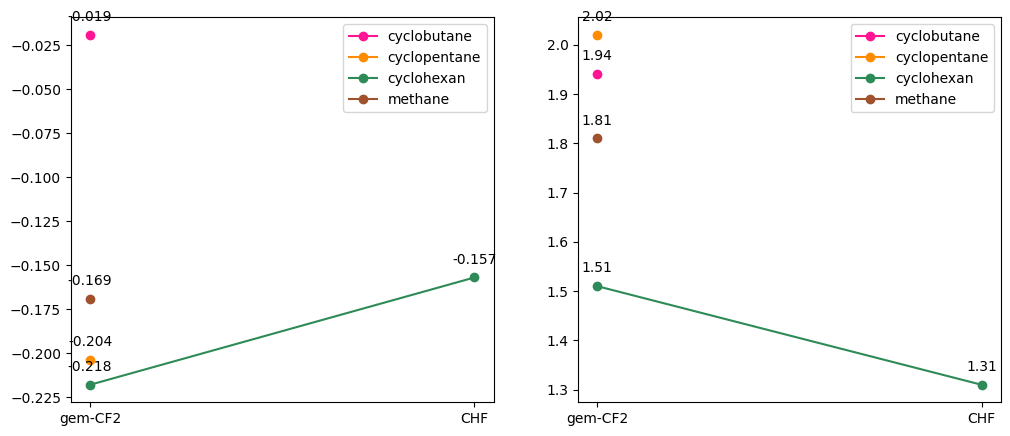

In [35]:
import matplotlib.pyplot as plt

cyclobutane_color = {1: 'indigo', 2: 'deeppink', 3: 'deeppink'}
cyclopentane_color = {1: 'plum', 2: 'darkorange', 3: 'darkorange'}
cyclohexan_color = {1: 'turquoise', 2: 'gold', 3: 'seagreen'}
methane_color = {1: 'grey', 2: 'tan', 3: 'sienna'}

cyclobutane_name = 'cyclobutane'
cyclopentane_name = 'cyclopentane'
cyclohexan_name = 'cyclohexan'
methane_name = 'methane'

cyclobutane_logP = {1: {'H': [1.13]}, 2: {'H': [1.13]}, 3: {'H': [1.13]}}
cyclopentane_logP = {1: {'H': [1.19]}, 2: {'H': [1.19]}, 3: {'H': [1.19]}}
cyclohexan_logP = {1: {'H': [1.39]}, 2: {'H': [1.39]}, 3: {'H': [1.39]}}
methane_logP = {1: {'H': [1.03], 'CF3': [1.76]}, 2: {'H': [1.31]}, 3: {'H': [1.72]}}

for distance_global in range(2, 4):
    
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
    
    # X_optimal = ['H', 'CH2F', 'CHF2', 'CF3']
    # X_optimal = ['H', 'CHF', 'CH2F', 'gem-CF2', 'CHF2', 'CF3']
    X_optimal = ['gem-CF2', 'CHF', 'CHF double']
    for SMILES, distance in smiles_to_distance_to_nitrogen.items():
        logP_value = SMILES_to_logP[SMILES]
    
        if distance != distance_global:
            continue
        
        if 'cyclohexane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclohexan:
                cyclohexan[distance_global][f_group].append(SME_fluorine[SMILES])
                cyclohexan_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclohexan[distance_global][f_group] = [SME_fluorine[SMILES]]
                cyclohexan_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("cyclohexane", f_group, SMILES, logP_value, SME_fluorine[SMILES])

        elif 'cyclopentane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclopentane:
                cyclopentane[distance_global][f_group].append(SME_fluorine[SMILES])
                cyclopentane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclopentane[distance_global][f_group] = [SME_fluorine[SMILES]]
                cyclopentane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("cyclopentane", f_group, SMILES, logP_value, SME_fluorine[SMILES])

        elif 'cyclobutane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclobutane:
                cyclobutane[distance_global][f_group].append(SME_fluorine[SMILES])
                cyclobutane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclobutane[distance_global][f_group] = [SME_fluorine[SMILES]]
                cyclobutane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("cyclobutane", f_group, SMILES, logP_value, SME_fluorine[SMILES])
        
        elif 'methane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group == 'non-F':
                continue
            if f_group in methane:
                methane[distance_global][f_group].append(SME_fluorine[SMILES])
                methane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                methane[distance_global][f_group] = [SME_fluorine[SMILES]]
                methane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("methane", f_group, SMILES, logP_value, SME_fluorine[SMILES])

    for molecule_group, color, label, logP_dict in [(cyclobutane, cyclobutane_color, cyclobutane_name, cyclobutane_logP), 
                                                    (cyclopentane, cyclopentane_color, cyclopentane_name, cyclopentane_logP), 
                                                    (cyclohexan, cyclohexan_color, cyclohexan_name, cyclohexan_logP), 
                                                    (methane, methane_color, methane_name, methane_logP)]:
        X, y_relevance, y_logP = [], [], []
        if distance_global not in molecule_group:
            continue
        
        for f_group_optimal in X_optimal:
            if f_group_optimal not in molecule_group[distance_global]:
                continue

            X.append(f_group_optimal)
            y_relevance.append(sum(molecule_group[distance_global][f_group_optimal]) / len(molecule_group[distance_global][f_group_optimal]))
            y_logP.append(sum(logP_dict[distance_global][f_group_optimal]) / len(logP_dict[distance_global][f_group_optimal]))

        print(X, y_relevance, y_logP)
        ax1.plot(X, y_relevance, marker='o', linestyle='-', color=color[distance_global], label=label)
        for i in range(len(X)):
            ax1.annotate(f"{str(y_relevance[i])}", (X[i], y_relevance[i]), xytext=(0, 10), textcoords='offset points', ha='center')
        ax1.legend()

        ax2.plot(X, y_logP, marker='o', linestyle='-', color=color[distance_global], label=label)
        for i in range(len(X)):
            ax2.annotate(f"{str(y_logP[i])}", (X[i], y_logP[i]), xytext=(0, 10), textcoords='offset points', ha='center')
        ax2.legend()

    plt.show()
    
    
